Sklearn

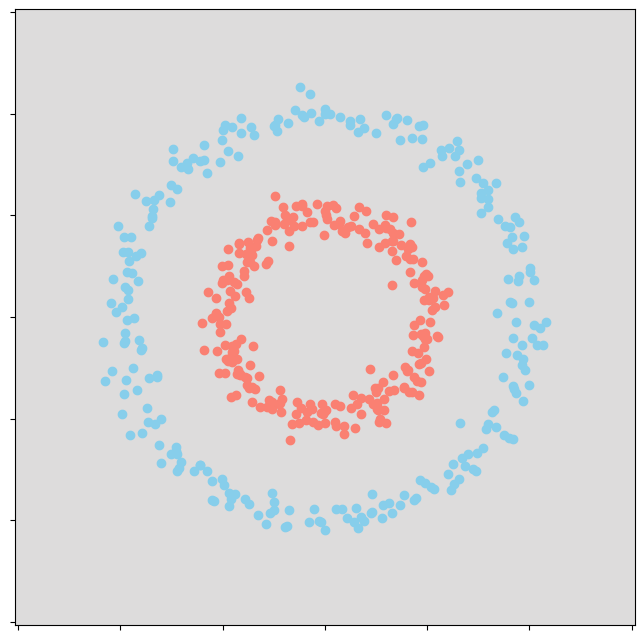

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.datasets import make_circles

#Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concéntricos de datos
X, Y = make_circles(n_samples=500, noise=0.05, factor=0.5)

res=100

#Coordenadas del mapa de predición
_xo = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

#Input con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_xo, _x1)).T.reshape(-1, 2)

# Objeto vacío a 0.5 del mapa de predicción
_pY = np.zeros((res, res)) +0.5

#Visualización del mapa de predicción
plt.figure(figsize=(8,8))
plt.pcolormesh(_xo, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)


#Visualización de la nube de datos
plt.scatter(X[Y==0, 0], X[Y==0, 1], c="skyblue")
plt.scatter(X[Y==1, 0], X[Y==1, 1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

TensorFlow

In [ ]:
#Import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display,HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr=0.01           #learning rate
nn=[2,16,8,1]     #número de neuronas por capa

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX,W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1,W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

#Vector de predicciones de Y
pY  = tf.nn.sigmoid(tf.add(tf.matmul(l2,W3), b3))[:,0]

# Evaluacion de las predicciones
loss = tf.losses.mean_squared_error(pY,iY)

#Definimos al optimizador de la red, par que minimice el error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps=1000          #Numero de ciclos de entrenamiento
iPY=[]                #Vector de predicciones. Aqui guardaremos la evolucion de las
                     #predicciones en cada ciclo de entrenamiento, para la animacion

with tf.Session() as sess:
  # Inicializamos todos los parametros de la red, las matrices W y b
    sess.run(tf.global_variables_initializer())
    # Iteramos n pases de entrenamiento
    for step in range(n_steps):
      # Evaluamos al optimizador, a la funci[on de coste y al tensr de salida pY
      # La evaluacion del optimizer producira el entrenamiento de la red
      _, _loss, pY = sess.run([optimizer, loss, pY], feed_dict={iX : X, iY : Y})
      # Cada 25 interacciones, imprimimos metricas
      if step % 25 == 0:
        # Calculo del accuracy
        acc = np.mean(np.round(_pY) == Y)
        # Impresion de metricas
        print('Step',step,'/',n_steps,'- Loss =', _loss, '-Acc =',acc)
        # Obtenemos predicciones para cada punto de nuestro mapa de predicciones _pY
        _pY = sess.run(pY, feed_dict={iX: _pX}).reshape((res, res))
        # Guardamos las predicciones en iPY para visualizar la animacion
        iPY.append(pY)

# Codigo Animacion
ims=[]
fig=plt.figure(figsize=(10,10))
print('---  Generando animacion  ---')

for fr in range(len(iPY)):
  im =plt.pcolormesh(_x0,x1,iPY[fr],cmap='coolwarm',animated=True)
  # Visualizacion de la nube de datos
  plt.scatter(X[Y==0, 0], X[Y==0, 1], c="skyblue")
  plt.scatter(X[Y==1, 0], X[Y==1, 1], c="salmon")
  # plt.title("Resultado Clasificacion")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani=animation.ArtistAnimation(fig,ims,interval=50,blit=True,repeat_delay=1000)
HTML(ani.to_html5_video())




ValueError: operands could not be broadcast together with shapes (100,100) (500,) 

Keras

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr

lr=0.01           #learning rate
nn=[2,16,8,1]     #número de neuronas por capa

# Creamos el objeto que contendrá a nuestra red neuronal como secuencia de capas
model = kr.Sequential()

# Agregamos una capa de entrada, capa 1
l1=model.add(keras.layers.Dense(nn[1],activation='relu'))

# Agregamos una capa oculta, capa 2
l2=model.add(keras.layers.Dense(nn[2],activation='relu'))

# Agregamos una capa de salida, capa 3
l3=model.add(keras.layers.Dense(nn[3],activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. los callbacks
model.fit(X,Y, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.2367 - acc: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2363 - acc: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2360 - acc: 0.5000
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2357 - acc: 0.5000
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2354 - acc: 0.5000
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2351 - acc: 0.5000
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2348 - acc: 0.5000
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2345 - acc: 0.5000
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2342 - acc: 0.5020
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2339 - acc: 0.5020
Epoch 11/100
16/16 [==============================] - 0s 3m